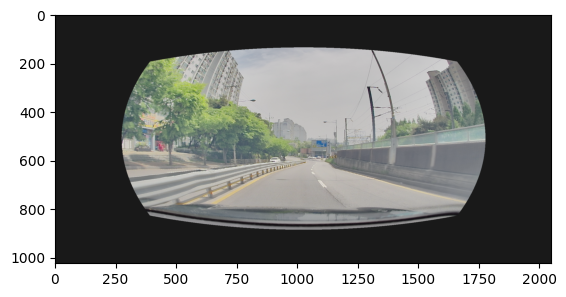

In [7]:
import os
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.backends.cudnn as cudnn

from tqdm import tqdm
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt

import numpy as np
from math import sqrt

def get_fish_xn_yn(source_x, source_y, radius, distortion):
    if 1 - distortion*(radius**2) == 0:
        return source_x, source_y

    return source_x / (1 - (distortion*(radius**2))), source_y / (1 - (distortion*(radius**2)))

def fisheye_effect(img, distortion_coefficient):
    w, h = img.shape[0], img.shape[1]
    dstimg = np.full_like(img, 25)  # Initialize with 25
    w, h = float(w), float(h)

    for x in range(len(dstimg)):
        for y in range(len(dstimg[x])):

            xnd, ynd = float((2*x - w)/w), float((2*y - h)/h)
            rd = sqrt(xnd**2 + ynd**2)
            xdu, ydu = get_fish_xn_yn(xnd, ynd, rd, distortion_coefficient)
            xu, yu = int(((xdu + 1)*w)/2), int(((ydu + 1)*h)/2)

            if 0 <= xu and xu < img.shape[0] and 0 <= yu and yu < img.shape[1]:
                dstimg[x][y] = img[xu][yu]

    return dstimg.astype(np.uint8)

def apply_fisheye_distortion(image, mask=False):
    # 이미지 크기 가져오기
    height, width = image.shape[:2]

    # 카메라 매트릭스 생성
    focal_length = width / 4
    center_x = width / 2
    center_y = height / 2
    camera_matrix = np.array([[focal_length, 0, center_x],
                              [0, focal_length, center_y],
                              [0, 0, 1]], dtype=np.float32)

    # 왜곡 계수 생성
    dist_coeffs = np.array([0, 0.5, 0, 0], dtype=np.float32)

    # 왜곡 보정
    undistorted_image = cv2.undistort(image, camera_matrix, dist_coeffs)

    return(undistorted_image)

def main():
    image = Image.open("/content/drive/MyDrive/컴퓨터 비전/tool/TRAIN_SOURCE_0000.png")
    # image = image.convert('RGB')
    image = np.array(image)
    distortion_coefficient = 0.5
    # image_fish = apply_fisheye_distortion(image, distortion_coefficient)
    image_fish = fisheye_effect(image, distortion_coefficient)
    cv2.imwrite("./result.png", image_fish)
    plt.imshow(image_fish)
    plt.show()

if __name__ == "__main__":
    main()

In [2]:
!pwd

/content
